In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Population_Data.csv')
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [3]:
numeric =['Indians','Foreigners','Indian_Male','Indian_Female','Foreigners_Male',
          'Foreigners_Female','Total Population']

In [4]:
def cleaner(z):
    return z.replace(',','')

In [5]:
for i in data[numeric]:
    data[i]=data[i].apply(cleaner)
    
data.info()    
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
Region                38 non-null object
Office Location Id    38 non-null int64
Indians               38 non-null object
Foreigners            38 non-null object
Indian_Male           38 non-null object
Indian_Female         38 non-null object
Foreigners_Male       38 non-null object
Foreigners_Female     38 non-null object
Total Population      38 non-null object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [6]:
data[numeric]=data[numeric].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
Region                38 non-null object
Office Location Id    38 non-null int64
Indians               38 non-null int64
Foreigners            38 non-null int64
Indian_Male           38 non-null int64
Indian_Female         38 non-null int64
Foreigners_Male       38 non-null int64
Foreigners_Female     38 non-null int64
Total Population      38 non-null int64
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


In [7]:
data[['Indian_Male','Indian_Female','Foreigners_Male',
          'Foreigners_Female']].sum().sum()-data['Total Population'].sum()

-112859

In [8]:
sum_pop=data['Indian_Male']+data['Indian_Female']+data['Foreigners_Male']+data['Foreigners_Female']
data['Others']=data['Total Population']-sum_pop
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Others
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [9]:
 data1=data.drop(columns=['Total Population','Region','Office Location Id'])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Others
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


In [10]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
columns=data1.columns
data1=norm.fit_transform(data1)
data1=pd.DataFrame(data1,columns=columns)
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Others
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


In [11]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(data1)
predictions=kmeans.predict(data1)

In [12]:
predictions ,len(predictions)

(array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 38)

In [13]:
kmeans.inertia_

0.028113285898827122

In [14]:
inertia=[]
for cluster in range(1,10):
    kmeans=KMeans(n_jobs=-1,n_clusters=cluster)
    kmeans.fit(data1)
    inertia.append(kmeans.inertia_)

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.

In [15]:
frame=pd.DataFrame({'Clusters':range(1,10),'Inertia':inertia})

Text(0, 0.5, 'Inertia')

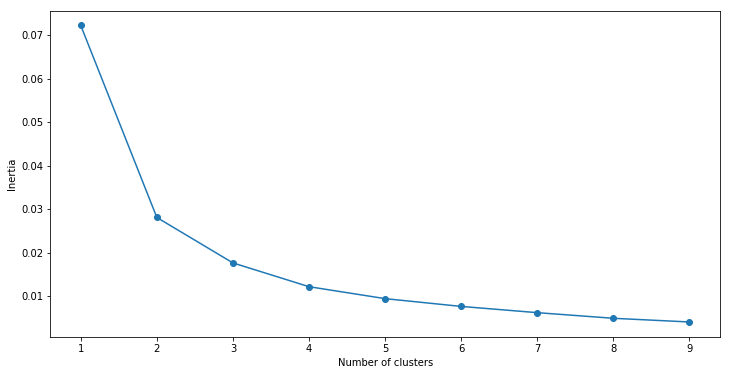

In [16]:
plt.figure(figsize=(12,6))
plt.plot(frame['Clusters'],frame['Inertia'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [17]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(data1)
predictions=kmeans.predict(data1)

In [19]:
data1['cluster'] = predictions

In [21]:
def seg(str_x, str_y, clusters):
  x = []
  y = []

  for i in range(clusters):
    x.append(data1[str_x][data1['cluster']==i])
    y.append(data1[str_y][data1['cluster']==i])
  
  return x,y

def plot_clusters(str_x, str_y, clusters):
  plt.figure(figsize = (5,5), dpi = 120)
  
  x,y = seg(str_x, str_y, clusters)

  for i in range(clusters):
    plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
  
  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+" Vs "+str_y))
  plt.legend()

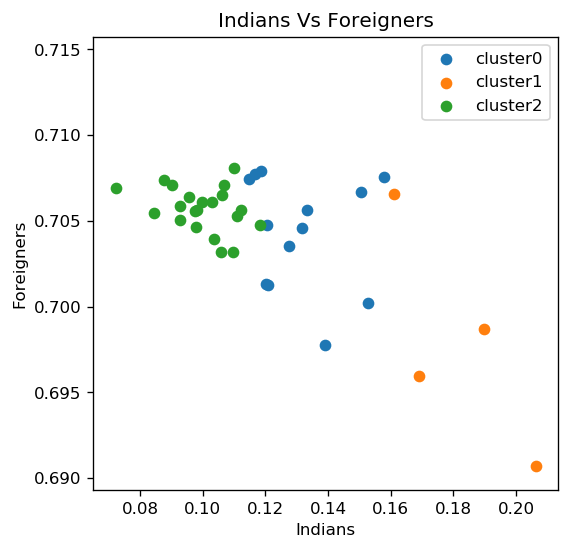

In [22]:
plot_clusters('Indians', 'Foreigners',3)